# Difference that Work Makes

In [9]:
import pandas as pd
import numpy as np
import math
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats  as stats

#https://github.com/fivethirtyeight/data/tree/master/marriage has a guide for keys


'''Keys guide for the dataframes.
HS = High school or less
SC = Some college
BAo = Bachelor's only
BAp = Bachelor's plus 
GD = Graduate degree 
White = White
Black = Black
Hisp = Hispanic
NE = Northeast
MA = Mid-Atlantic
Midwest, South, Mountain, Pacific
work = Employed 50+ weeks year prior 
nowork = NOT(work)
poor, mid, rich = [0-25], [25-75], [75-100] percentiles of family income.'''

'''Data on divorce measured at every decade from 1960-2000, then every year from 2001-2012.'''
divorce_df = pd.read_csv('data/divorce.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)
pd.to_numeric(divorce_df.index.values)

'''Figures in each cell are the share of that population that has never been married.'''
men_df = pd.read_csv('data/men.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
women_df = pd.read_csv('data/women.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
both_sexes_df = pd.read_csv('data/both_sexes.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''To save us multiple calls. Each dataset was measured in the exact same set of years. This array
of year values will be the x-axis argument for many plots.'''
years_tracked = both_sexes_df.index.values

'''
Plots marriage rates across time. 
DF is the dataframe we're pulling data from over time 
KEYS are the key values we're plotting. Each corresponds to a line on the plot.
LABELS are the labels for each key in the legend. Must be the same size as KEYS.
FLIP VALUES is a boolean which is true iff we want to plot 1-df[key] instead of df[key]
TITLE 
'''
def plot_marriagerate_over_time(df, keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): #will this compile? 
        if (flip_values): 
            ax.plot(years_tracked, 1 - df[keys[i]], label=labels[i])
        else:
            ax.plot(years_tracked, df[keys[i]], label=labels[i])
    ax.set_title(title, fontsize=50)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()
    
'''Assumes we\'re plotting the exact same values for both men and women
'''
def plot_marriagerate_menwomen(keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): #will this compile? 
        if (flip_values): 
            ax.plot(years_tracked, 1 - men_df[keys[i]], label=labels[i] + 'Men')
            ax.plot(years_tracked, 1 - women_df[keys[i]], label=labels[i] + 'Women')
        else:
            ax.plot(years_tracked, men_df[keys[i]], label=labels[i] + 'Men')
            ax.plot(years_tracked, women_df[keys[i]], label=labels[i] + 'Women')
    ax.set_title(title, fontsize=50)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


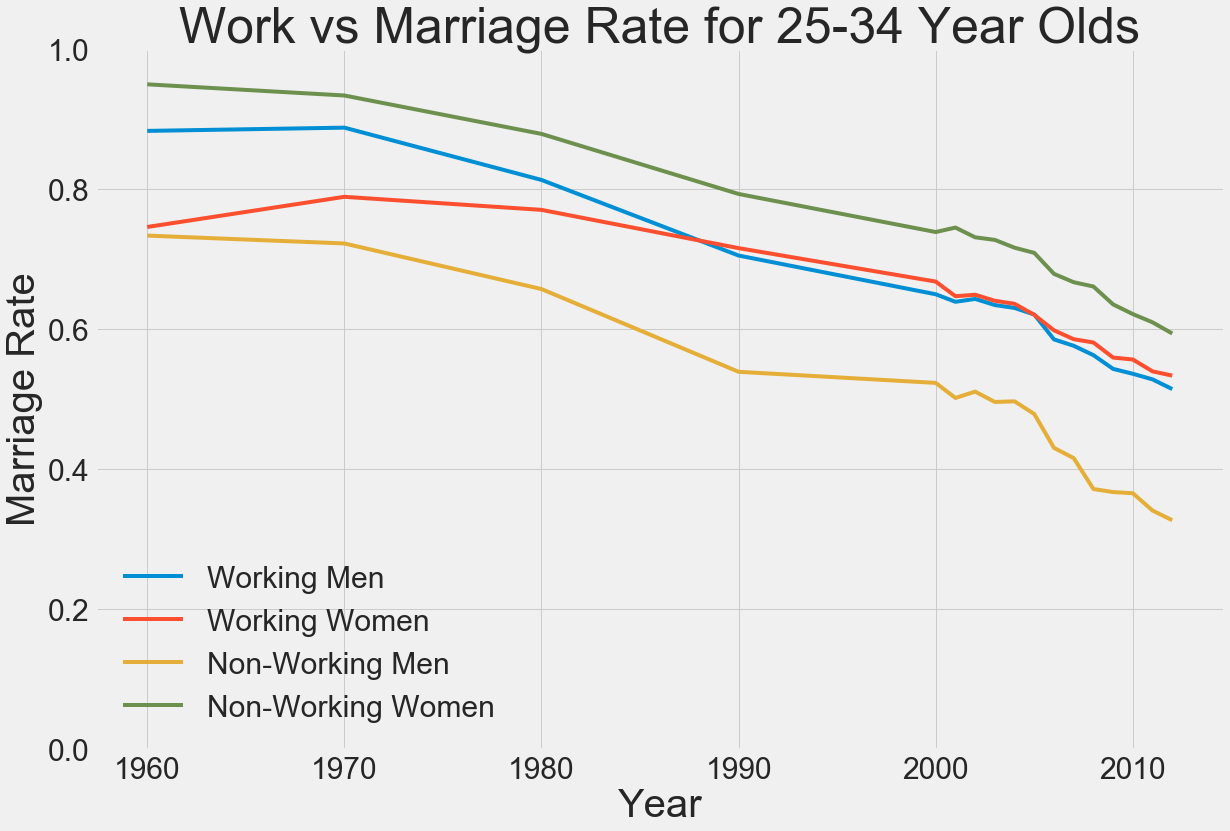

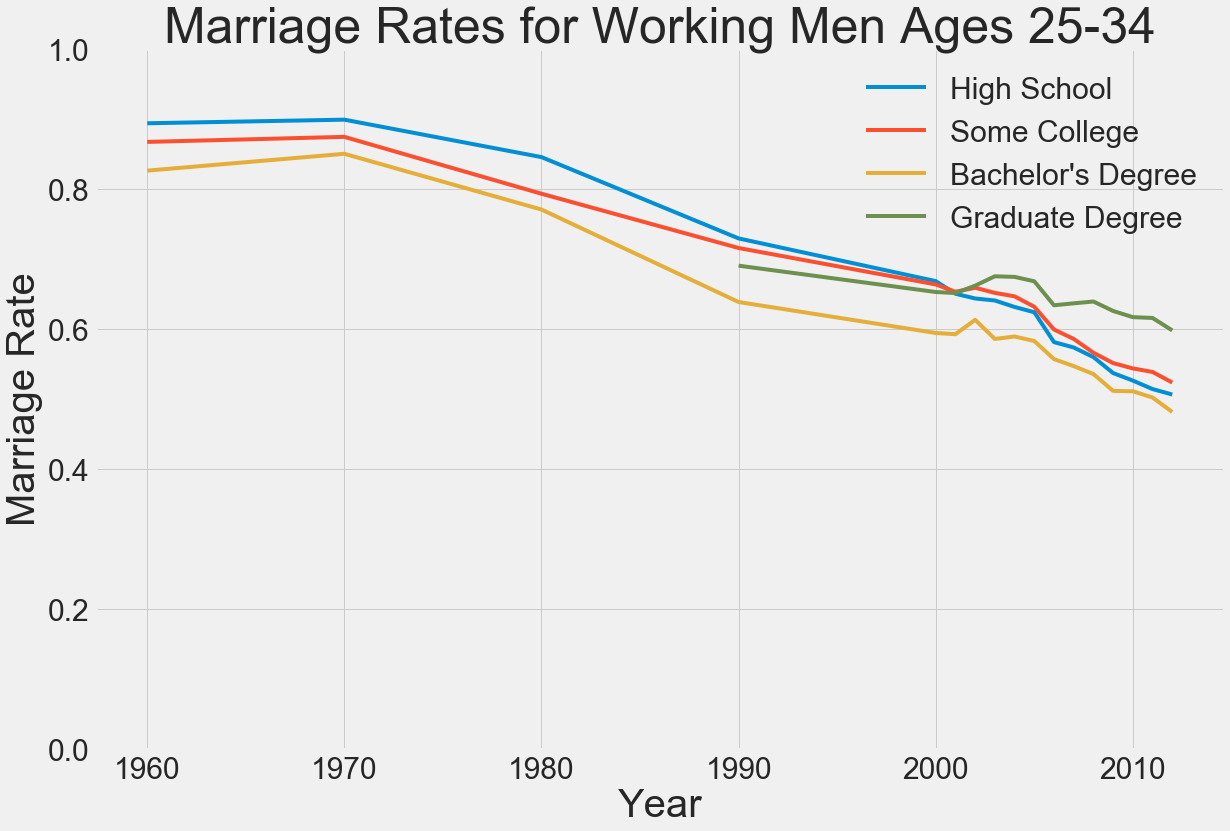

In [10]:


plot_marriagerate_menwomen(['work_2534', 'nowork_2534'], ['Working ', 'Non-Working '], 
                           'Work vs Marriage Rate for 25-34 Year Olds', True)

# plot_marriagerate_over_time(
#     both_sexes_df, ['HS_2534', 'SC_2534', 'BAp_2534', 'HS_3544', 'SC_3544', 'BAp_3544'], 
#     ['High School 25-34', 'Some College 25-34', 'Bachelor\'s Degree or More 25-34',
#     'High School 35-44', 'Some College 35-44', 'Bachelor\'s Degree or More 35-44'], 
#      'Marriage Rates and Education', True)
plot_marriagerate_over_time(
    men_df, ['work_HS_2534', 'work_SC_2534', 'work_BAo_2534', 'work_GD_2534'], 
    ['High School', 'Some College', 'Bachelor\'s Degree', 'Graduate Degree'],
     'Marriage Rates for Working Men Ages 25-34', True)

Now, I want to plot the difference between marriage rates within a particular demographic, with the relevant variable being whether a person is working or not. I suspect that demographic differences will emerge, but the big change will be the presence of kids at home.

1. Income levels make a difference. For men 25-34 in the top quartile, it makes a much bigger difference whether they work or not. 

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


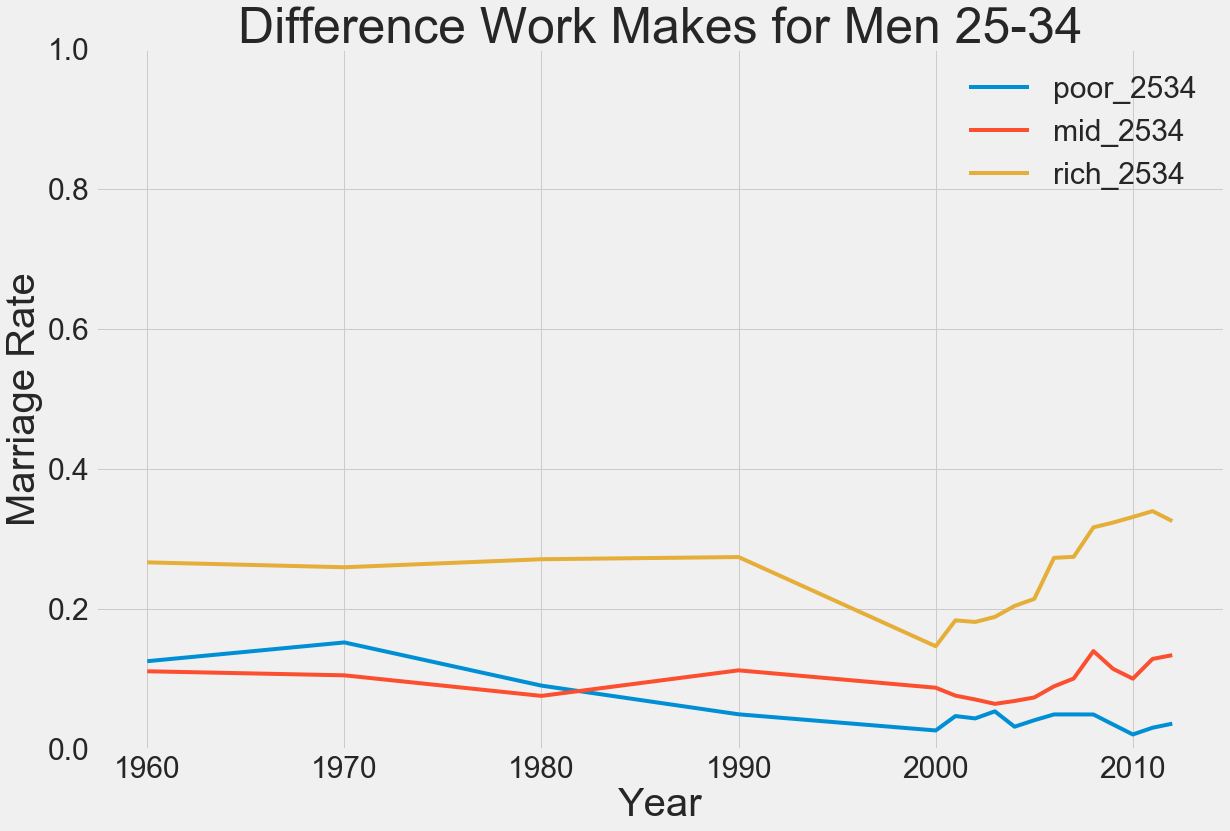

In [24]:
# work_2534	nowork_2534	work_HS_2534	work_SC_2534	work_BAp_2534	work_BAo_2534	
# work_GD_2534	nowork_HS_2534	nowork_SC_2534	nowork_BAp_2534	nowork_BAo_2534	nowork_GD_2534	
# work_White_2534	work_Black_2534	work_Hisp_2534	nowork_White_2534	nowork_Black_2534	
# nowork_Hisp_2534	work_poor_2534	work_mid_2534	work_rich_2534	nowork_poor_2534	
# nowork_mid_2534	nowork_rich_2534	nokids_all_2534	kids_all_2534	nokids_HS_2534	
# nokids_SC_2534	nokids_BAp_2534	nokids_BAo_2534	nokids_GD_2534	kids_HS_2534	
# kids_SC_2534	kids_BAp_2534	kids_BAo_2534	kids_GD_2534	nokids_poor_2534	
# nokids_mid_2534	nokids_rich_2534	kids_poor_2534	kids_mid_2534	kids_rich_2534

men_work_keys = ['HS_2534', 'SC_2534', 'BAo_2534', 'BAp_2534', 'GD_2534', 
                 'White_2534', 'Black_2534', 'Hisp_2534', 'poor_2534', 'mid_2534', 'rich_2534']
men_work_diff_keys = []
for key in men_work_keys: 
    diff_key = 'work_diff_' + key
    men_df[diff_key] =  men_df['nowork_' + key] - men_df['work_' + key]
    men_work_diff_keys.append(diff_key)

plot_marriagerate_over_time(men_df, men_work_diff_keys[8:11], men_work_keys[8:11], 
                            'Difference Work Makes for Men 25-34', False)